# Loss and Optimization

###  Now that we at least have a rough idea of what gradients and backpropagation is, lets put together the whole picture of a neural network. A standard feedforward neural network looks like this:

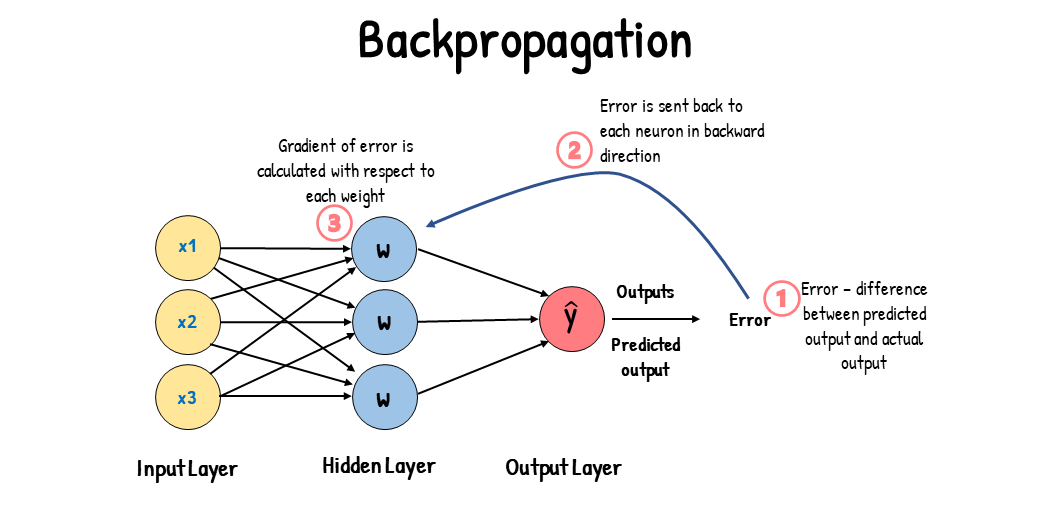

### We start by feeding inputs into our input layer, going through some hidden layers (discussed more deeply in a few notebooks), we use some initial weights within the model to make a prediction, and then we make a prediction via the output layer. 

### The predictions are then compared to the true values, and the error is calculated. Via the backpropagation equation, the gradients are then calculated and the internal weights are updated in the oppostie direction of the gradient vector. Remember this?

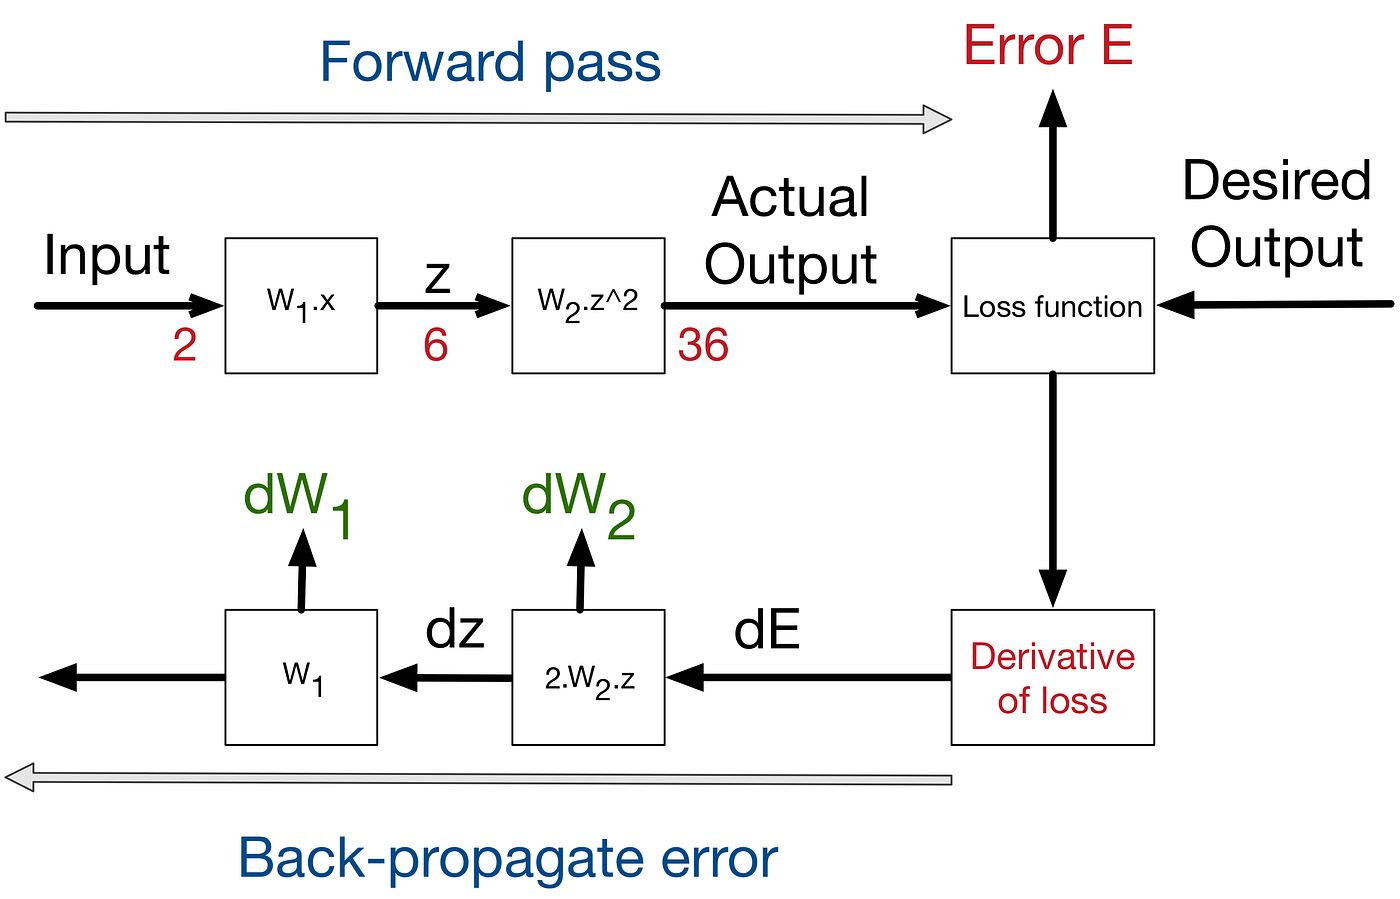


### Lets recall that the loss function which we use to calculate the difference between the actual and predicted values is like a hilly landscape, and we are trying to get to the bottom of it to minimize our loss (which is always a good thing). In the following picture, imagine the loss function is all the colored stuff and the line is the path you want to take to get to the bottom

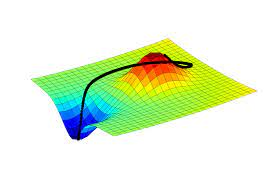

### The way we do in a simple feedforward neural network is by updating the weights to minimize the loss. The method by which we update those weights is determined by the optimizer.

### Lets dive in to different loss functions and optimizers and get a feel for how it is all working. We will also introduce the idea of activation functions at the end of this notebook. In the next notebook we will put it all together and build a linear regression model in PyTorch


In [ ]:
import torch

## We will start with loss functions

### Like we said earlier, the loss function is the hilly landscape that we roll down in search of the minimum (as we want to minimize the loss, which is alwasy a good thing). The loss function is responsible for computing the difference between predictions and actual data

### Mean Squared Error is a commonly used loss function in regression problems (see the heart disease project in module 3 for an example). It calculates the squared difference between predicted and actuial values. It is important to calculate the squared difference as this greater emphasizes cases where the difference was large (if the difference was 2, mean squared error is 4. If the differens was 10, mean squared error is 100. We would much rather be off by 2 than 10!) This is not a real model or anywhere close, rather than just a sample implementation of Mean Squared Error

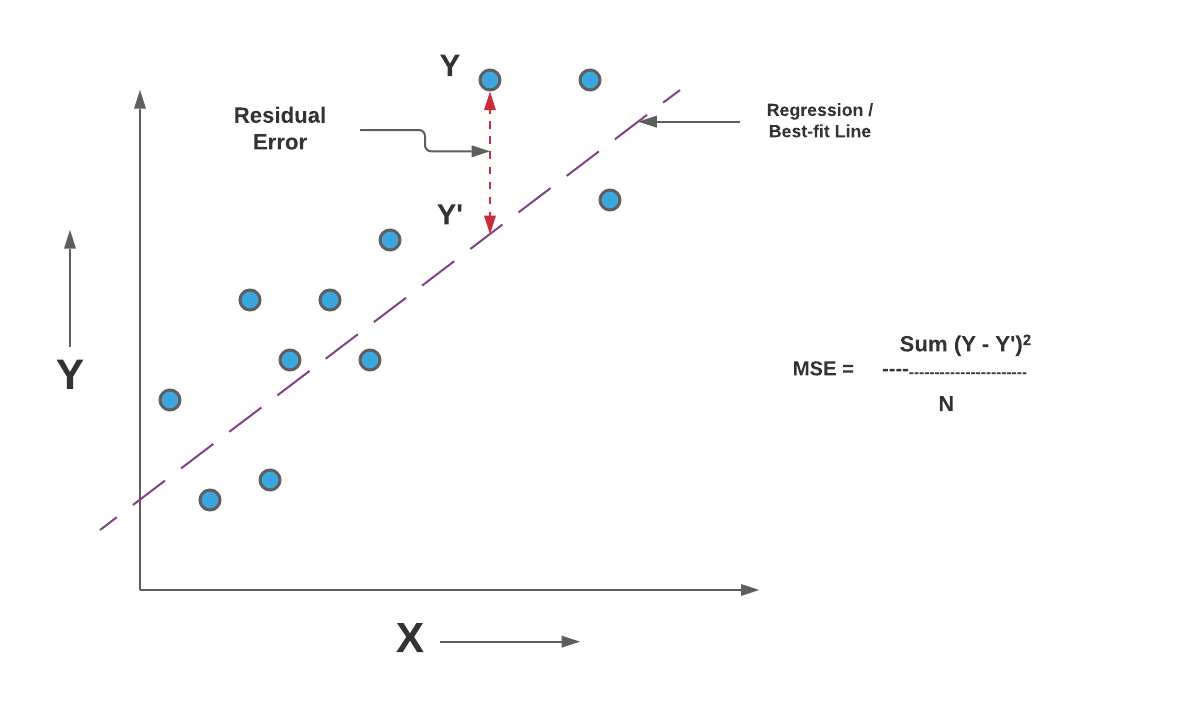

In [ ]:
mse_loss = torch.nn.MSELoss() # define the loss variable by creating an instance of the MSELoss method from the nn class
input_mse = torch.randn(3, 5, requires_grad=True) # create a random tensor of shape 3x5 that requires gradient. Becasue these are the inputs, we want to compute gradients on them to improve our predictions over time
target_mse = torch.randn(3, 5) # create a random tensor of shape 3x5 where we dont comute gradients. This is the goal of the model to reach, so we dont calculate a gradient to update the weights based on them 
output_mse = mse_loss(input_mse, target_mse) # compute the loss submitting the input and target 
print(output_mse) # print the loss 
output_mse.backward() # Calculate the gradients using the backpropagation equation. This is a crucial step as it will find the gradients that we will later use for optimization


### Cross Entropy Loss is another commonly used loss function for binary and multi-class classification problems. It measures the performance of a classification model whose output is a probability between 0 and 1. This is not a real model or anywhere cloe, rather than just a sample implementation of Cross Entropy Loss

In [ ]:
cel_loss = torch.nn.CrossEntropyLoss() # Define the loss function
input_cel = torch.randn(3, 5, requires_grad=True) # Create a random tensor of shape 3x5 that requires gradient. 
                                              # You can think of this tensor as the output from your model for 3 different data points
                                              # (e.g. images, sentences, etc.), each of which has 5 possible classes. These are the predictions of your model.
                                              # for example, you could have 3 pictures of dogs with their breed being one of 5 classes that are being predicted
target_cel = torch.empty(3, dtype=torch.long).random_(5) # Create a tensor of shape 3 with random values
                                                    # For example, if this was a dog breed classifer model you could think of this as 3 pictures of 
                                                    # dogs and their breed would be the ground truth
output_cel = cel_loss(input_cel, target_cel) # Compute the loss
print(output_cel) # Print the loss
output_cel.backward() # Compute the gradients

### In this example (and the real world), the input tensor represents the output of your model (the predictions), and the target tensor represents the actual classes (ground truth). The CrossEntropyLoss function applies a softmax function to the input (to get a probability distribution over classes), calculates the negative log likelihood of the target, and returns the mean over all instances. There is a lot of math to learn to understand this, but we encourage you to give it a go on your own.
### It's also worth mentioning the .backward() method again here. As said earlier, it computes the gradient of the loss with respect to all tensors with requires_grad=True. These gradients will be used to update the weights and biases during the optimization step.


## **Now lets go over optimizers**

### Like we said earlier, optimizers are the means by which we update the weights given the gradient calculated via our loss function and backpropagation. Remember, we update the weights in the negative direction of the gradient because we want to *minimize* the loss

### There are lots of different optimizers available, but there are really only a few commonly used ones. We will show you the implementation of 2 without going too deep in the weeds. This will all make more sense in practice in later notebooks, but we want to show you the syntax for setting it up here

### lets first define a sample model for the purposes of showing the optimizer This concept be covered in excrutiating detail in the next notebook so pay it no mind for now. Literally run it and skip it...

In [ ]:
# Simple neural network
model = torch.nn.Sequential(
    torch.nn.Linear(5, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 5),
)

### Stochastic Gradient Descent (SGD) is a type of iterative method for optimizing an objective function. It's known for its simplicity and efficiency. When in doubt you can normally stochatically gradient it out 

### We also have to introduce you to one more very important concept in AI which is the learning rate. This value is important with optimizers as it plays an important role in converging towards the minimum loss 

### Lets go back to standing on the peak of a hill in the hilly landscape of the metaphorical loss function. At this point we just kind of insinuated that you find your way to the bottom of the hill, but we didn't tell you how you get there. Well, you get there by walking!

### We need to tell our optimizer (when using SGD) how big of steps to take down the hill. This is what the learning rate is. It defines the step size you take as you descend towards the minimum. The reason it is important to choose a good learning rate is the size of steps you take matters. If you take too big of steps you could accidentally walk over the minimum of the mountain range. If you take small steps you will get there eventually, but it might take a really long time and you'll spend forever training your models.  .1,.01, or .001 are generally good places to start, but you might have to finetune this hyperparameter in order to find the best one for your problem.


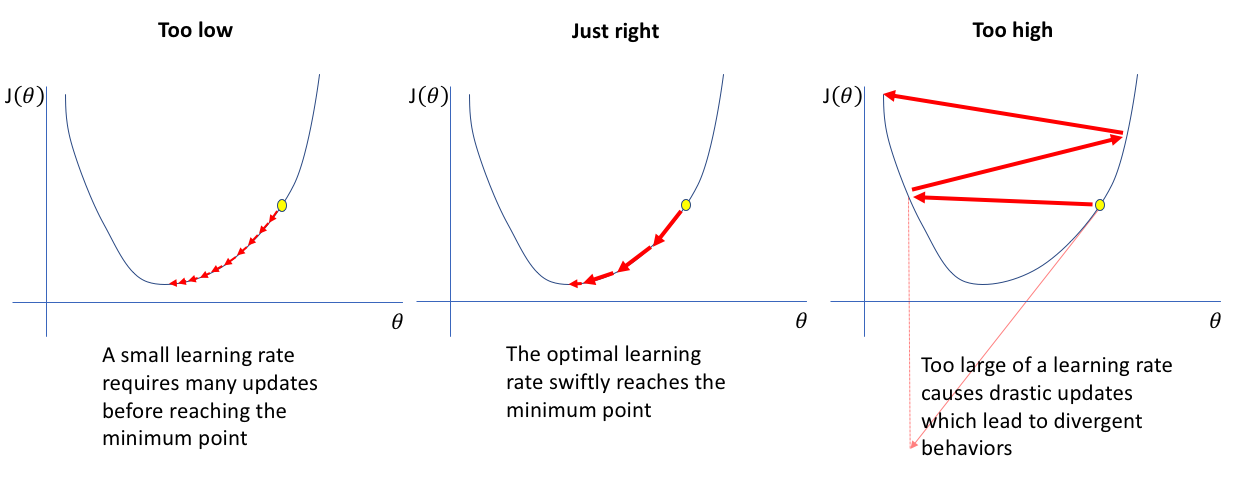


In [ ]:
# Define an SGD optimizer. The optimizer will update the parameters (weights and biases) of our model.
# We pass in two arguments: model.parameters() and a learning rate (lr).
# model.parameters() is a method that returns an iterator of all the parameters (weights and biases) of the model that need gradients.
# The learning rate (lr) is a hyperparameter that controls how much we are adjusting the weights of our network with respect to the loss gradient.
# Hyperparameters require a lot of fine tuning. Intuition about where to start comes from your domain knowledge and hard earned experience
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Before the backward pass (i.e., computation of gradients), use the optimizer object to zero all of the gradients for the variables it will update.
# This is because by default, gradients are accumulated in buffers (i.e., not overwritten) whenever .backward() is called.
optimizer.zero_grad()

# Compute the Mean Squared Error (MSE) loss between the model's predictions and the actual target values.
# Then, perform backpropagation via the .backward() method which computes the gradient of the loss with respect to the parameters (weights and biases) of the model.
mse_loss(model(input_mse), target_mse).backward()

# The optimizer updates each parameter based on its current gradient (stored in .grad) and learning rate.
optimizer.step()

### Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. It computes adaptive learning rates for different parameters.

In [ ]:
# Now, let's use a different optimizer - Adam, which is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks.
# Similar to the SGD optimizer, we pass in two arguments: model.parameters() and a learning rate (lr).
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Zero all of the gradients for the variables that the optimizer will update.
optimizer.zero_grad()

# Compute the Cross Entropy Loss (CEL) between the model's predictions and the actual target values.
# Then, perform backpropagation via the .backward() method which computes the gradient of the loss with respect to the parameters (weights and biases) of the model.
cel_loss(model(input_cel), target_cel).backward()

# The optimizer updates each parameter based on its current gradient and learning rate.
optimizer.step()

### As you can see, the process is similar regardless of the type of optimizer or loss function used. The key steps are computing the loss, performing backpropagation to compute gradients, and then updating the model parameters using the optimizer.

## **ReLU (Rectified Linear Unit)**

### ReLU is the most commonly used activation function in neural networks and deep learning models. The function returns 0 if the input is negative or zero, and if input is positive, it returns the input itself.
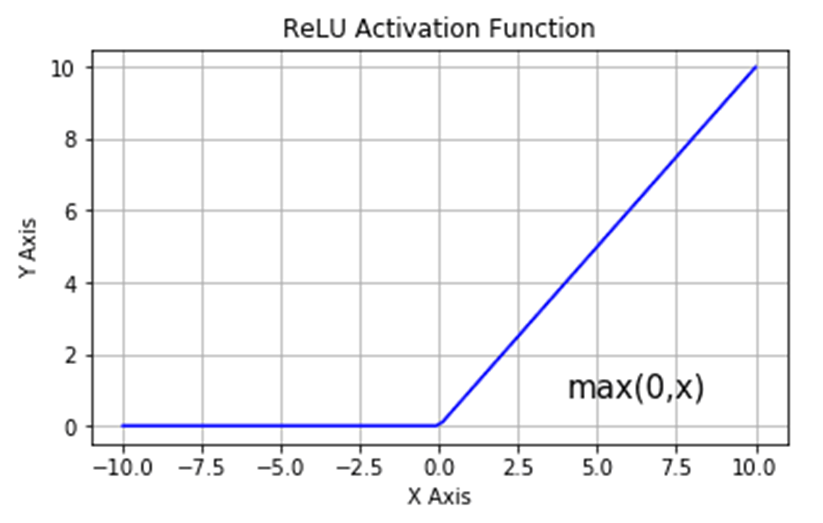

### The buzzword for why ReLU is used is because it helped solve the vanishing gradient problem. This was an issue in very deep neural networks where the gradient that gets backpropagated (which you know all about now) dissapears as the network got deeper. Don't worry about this. **Just know you use ReLU a lot of the time and dont be scared when you see it**

In [ ]:
m = torch.nn.ReLU()
input = torch.randn(2)
print(input)
output = m(input)
print(output)